In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam

# Load Data into Colab

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Final_Dataset.csv to Final_Dataset (1).csv


In [0]:
df = pd.read_csv(r"Final_Dataset.csv", index_col=0)

In [5]:
df.head()

,Number of Incidents,Implied vehicules,Serious injury,Light injury,Total victims,Trucks and car,Heavy tractor,Tool equipment,Bus,Bicycle,Moped,Motorcycle,Emergency vehicule,Snowmobile,VHR,Other types,Non-Precise vehicule,Pedestrian death,Pedestrian injury,Pedestrian victims,Motorcycle death,Motorcycle injuries,Motorcycle victims,Bicycle death,Bicycle injury,Bicycle victims,Severity: Inferior damages,Severity: Material damages,Severity: Serious injury,Severity: Light injury,Severity: Death,pr_CNRM-CM5_historical_rcp26_(kg m-2 d-1),pr_CNRM-CM5_historical_rcp45_(kg m-2 d-1),pr_CNRM-CM5_historical_rcp85_(kg m-2 d-1),pr_MIROC-ESM-CHEM_historical_rcp26_(kg m-2 d-1),pr_MIROC-ESM-CHEM_historical_rcp45_(kg m-2 d-1),pr_MIROC-ESM-CHEM_historical_rcp85_(kg m-2 d-1),pr_MIROC-ESM_historical_rcp26_(kg m-2 d-1),pr_MIROC-ESM_historical_rcp45_(kg m-2 d-1),pr_MIROC-ESM_historical_rcp85_(kg m-2 d-1),pr_MRI-CGCM3_historical_rcp26_(kg m-2 d-1),pr_MRI-CGCM3_historical_rcp45_(kg m-2 d-1),pr_MRI-CGCM3_historical_rcp85_(kg m-2 d-1),GRID_45.458333155|-73.625002695,GRID_45.458333155|-73.70833602500002,GRID_45.458333155|-73.791669355,GRID_45.458333155|-73.875002685,GRID_45.458333155|-73.958336015,GRID_45.541666485|-73.541669365,GRID_45.541666485|-73.625002695,GRID_45.541666485|-73.70833602500002,GRID_45.541666485|-73.791669355,GRID_45.541666485|-73.875002685,GRID_45.624999815|-73.541669365,GRID_45.624999815|-73.625002695,GRID_45.624999815|-73.70833602500002,GRID_45.624999815|-73.791669355,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,11.0,24.0,1.0,6.0,7.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,2.0,0.0,5.517578,-0.000092,1.501404,0.976471,6.542969,-0.000092,0.891022,14.624145,-0.000092,4.003876,4.943848,-0.000092,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.541992,-0.000092,1.574646,0.939850,6.396484,-0.000092,0.866608,14.343384,-0.000092,3.894013,4.736298,-0.000092,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.615234,0.170807,1.599060,0.927643,6.298828,-0.000092,0.878815,14.404419,-0.000092,3.906220,4.711883,-0.000092,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,5.651855,0.610260,1.586853,1.525818,6.262207,-0.000092,1.147400,14.026001,-0.000092,3.918426,4.748505,-0.000092,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.737305,0.732330,1.538025,1.501404,6.188965,-0.000092,1.489197,13.769653,-0.000092,3.808563,4.785126,-0.000092,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Identify Possible Targets

In [0]:
possible_targets = ['Number of Incidents', 'Implied vehicules', 'Serious injury',
       'Light injury', 'Total victims', 'Trucks and car', 'Heavy tractor',
       'Tool equipment', 'Bus', 'Bicycle', 'Moped', 'Motorcycle',
       'Emergency vehicule', 'Snowmobile', 'VHR', 'Other types',
       'Non-Precise vehicule', 'Pedestrian death', 'Pedestrian injury',
       'Pedestrian victims', 'Motorcycle death', 'Motorcycle injuries',
       'Motorcycle victims', 'Bicycle death', 'Bicycle injury',
       'Bicycle victims', 'Severity: Inferior damages',
       'Severity: Material damages', 'Severity: Serious injury',
       'Severity: Light injury', 'Severity: Death']

In [0]:
target = 'Number of Incidents'
targets = [*possible_targets]
targets.remove(target)

# Train/Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(possible_targets, axis=1), df[target], test_size=0.33)

In [0]:
input_shape = len(X_train.columns)

In [10]:
input_shape

43

In [11]:
print(X_train.shape, y_train.shape)

(17623, 43) (17623,)


# Construct & Train DNN

In [36]:
model = Sequential()
#model.add(Dropout(0.20))
model.add(Dense(200, activation='elu', input_shape=(input_shape,)))
model.add(Dropout(0.20))
model.add(Dense(250, activation='elu'))
model.add(Dropout(0.20))
model.add(Dense(1))

learning_rate = 1e-5
optimizer = Adam(lr=learning_rate)

model.compile(optimizer=optimizer,
             loss='mean_squared_error',
             metrics=['mean_absolute_error'])

h = model.fit(X_train, y_train, epochs=400, validation_split=0.2)

Train on 14098 samples, validate on 3525 samples
Epoch 1/400
14098/14098 [==============================] - 3s 208us/step - loss: 66.1128 - mean_absolute_error: 5.5204 - val_loss: 52.4865 - val_mean_absolute_error: 5.0364
Epoch 2/400
14098/14098 [==============================] - 2s 161us/step - loss: 53.5373 - mean_absolute_error: 5.2179 - val_loss: 49.5276 - val_mean_absolute_error: 5.1120
Epoch 3/400
14098/14098 [==============================] - 2s 161us/step - loss: 51.2467 - mean_absolute_error: 5.1984 - val_loss: 48.0380 - val_mean_absolute_error: 5.0775
Epoch 4/400
14098/14098 [==============================] - 2s 162us/step - loss: 49.6772 - mean_absolute_error: 5.1537 - val_loss: 46.9065 - val_mean_absolute_error: 5.0659
Epoch 5/400
14098/14098 [==============================] - 2s 167us/step - loss: 48.2895 - mean_absolute_error: 5.1085 - val_loss: 45.9774 - val_mean_absolute_error: 5.0435
Epoch 6/400
14098/14098 [==============================] - 2s 168us/step - loss: 47.49

In [34]:
h.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

# Plot Training Data

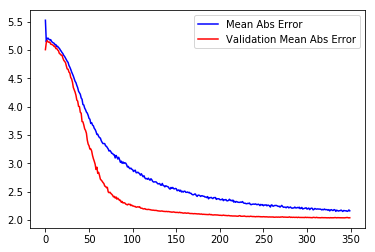

In [35]:
# Plot the history
import matplotlib.pyplot as plt
plt.plot(h.history['mean_absolute_error'], color='b', 
         label='Mean Abs Error')
plt.plot(h.history['val_mean_absolute_error'], color='r', 
         label='Validation Mean Abs Error')
plt.legend()